In [ ]:
      Qiskit contains tutorials on Quantum machine learning using QSVM (Quantum support vector machine) that uses 
wine dataset available at qiskit.ml.datasets.The data I used here is winequality-red.csv.
      First, we download, clean and look at the dataset to know the column names, summary of statistical measures
like mean, median and standard deviation. We use visualization to know most frequent quality rating of all the wines.
After, taking a look at the tutorial of QML using QSVM, it is known that a function named 'wine' was used to 
find PCA of the dataset. So, a new function 'data_wqr' was to be defined using winequality-red dataset to use the same code.
     After preliminary data exploration, we  an use QSVM algorithm to this classification problem. This algorithm can run multiclass
classification as ours is a multiclass dataset. The algorithm uses supervised learning.
The dataset is trained with class labels and the test data is used to predict and calculate how accurate is the algorithm for classification problem.
     I tried using the available tutorial and codes for solving this problem as I as solving a classification problem using QML for the first time. 
But could not complete it due to errors that could not be resolved. I have pasted the tutorial code just for reference. This code can be modified 
( Or similar approach can be used) to solve the classification problem using winequality dataset.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, BasicAer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.multiclass_extensions import AllPairs
from qiskit.aqua.utils.dataset_helper import get_feature_dimension

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-08-03 04:10:34,395: Credentials are already in use. The existing account in the session will be replaced.


In [18]:
# Downloading the dataset, cleaning it.
data_url = '../BosonQPsi/winequality-red.csv'
data_wqr = pd.read_csv(data_url, sep=';')
data_wqr.columns = data_wqr.columns.str.replace(' ','_')
# Info gives the column names and their data types. All columns are floats except quality which is an integer for each row.
data_wqr.info()
# Description contains information about mean, median, mode and standard deviation of the data. Counts is the number of red wine types.
data_wqr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
# Head displays the first few rows of the dataset so that we have an idea of what the dataset looks like.
data_wqr.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


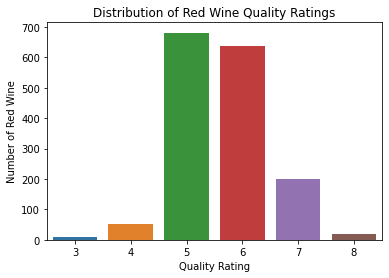

In [20]:
# Plot Quality ratings of wine against the Number of wines to know the most frequent quality rating of all wines. In this case, it is 5.
sns.barplot(data_wqr['quality'].unique(),data_wqr['quality'].value_counts())
plt.xlabel("Quality Rating")
plt.ylabel("Number of Red Wine")
plt.title("Distribution of Red Wine Quality Ratings")
plt.show()

In [21]:
# Print the data of above plot, i.e, frequency of quality rating. 5,6,7 quality ratings are most frequent
print(data_wqr['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [26]:
from qiskit.ml.datasets import wine
print(type(wine))

<class 'function'>


In [37]:
# Defining a function to be used in qsvm
def data_wqr(location,file,class_labels,training_size,test_size, n=2, PLOT_DATA=True):


    data, target, target_names = load_data(location = '../BosonQPsi/winequality-red.csv',
                                           file = 'winequality-red.csv')
    def load_data_wrapper():
        s = load_data()
        return s
    # sample_train is of the same form as data
    sample_train, sample_test, label_train, label_test = train_test_split(
        data, target,test_size=0.25, train_size=0.75 ,random_state=22)


    # Now we standarize for gaussian around 0 with unit variance
    std_scale = StandardScaler().fit(sample_train)
    sample_train = std_scale.transform(sample_train)
    sample_test = std_scale.transform(sample_test)


    # Now reduce number of features to number of qubits
    pca = PCA(n_components=n).fit(sample_train)
    sample_train = pca.transform(sample_train)
    sample_test = pca.transform(sample_test)


    # Samples are pairs of points
    sample_Total = np.append(sample_train, sample_test, axis=0)
    minmax_scale = MinMaxScaler((-1, 1)).fit(sample_Total)
    sample_train = minmax_scale.transform(sample_train)
    sample_test = minmax_scale.transform(sample_test)

    # If class labels are numeric
    if class_labels[0].isdigit():
        # Pick training size number of samples from each distro
        training_input = {key: (sample_train[label_train == int(key), :])[:training_size] for k, key in enumerate(class_labels)}
        test_input = {key: (sample_test[label_test == int(key), :])[: test_size] for k, key in enumerate(class_labels)}

    else:
        # if they aren't
        training_input = {key: (sample_train[label_train == k, :])[:training_size] for k, key in
                         enumerate(class_labels)}
        test_input = {key: (sample_train[label_train == k, :])[training_size:(
                training_size + test_size)] for k, key in enumerate(class_labels)}



    if PLOT_DATA:
        for k in range(0, 9):
            plt.scatter(sample_train[label_train == k, 0][:training_size],
                        sample_train[label_train == k, 1][:training_size])

        plt.title("PCA dim. reduced user dataset")
        plt.show()

    return sample_train, training_input, test_input, class_labels

In [40]:
# Code to plot PCA of reduced wine dataset
n = 2  # dimension of each data point
sample_Total, training_input, test_input, class_labels = data_wqr(location = '../BosonQPsi/winequality-red.csv',
                                           file = 'winequality-red.csv',class_labels,
                                           training_size=24,test_size=6, 
                                           n=n,PLOT_DATA=True)
temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/compilerop.py", line 101, in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  File "<ipython-input-40-5401577ec0d3>", line 3
    file = 'winequality-red.csv',class_labels,
                                 ^
SyntaxError: positional argument follows keyword argument

Use %tb to get the full traceback.


In [ ]:
aqua_globals.random_seed = 10598

backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dimension=get_feature_dimension(training_input),
                           reps=2, entanglement='linear')
svm = QSVM(feature_map, training_input, test_input, total_array,
           multiclass_extension=AllPairs())
quantum_instance = QuantumInstance(backend, shots=1024,
                                   seed_simulator=aqua_globals.random_seed,
                                   seed_transpiler=aqua_globals.random_seed)

result = svm.run(quantum_instance)
for k,v in result.items():
    print(f'{k} : {v}')
# The above two code cells can be used to solve the classification problem by modifyinf the code a little and 
# and integrating it to be used for the winequality dataset.